In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Sample data for student engagement in an online course
data = {
    'Student_ID': range(1, 11),
    'Course_Completion_Percentage': [85, 90, 78, 88, 92, 79, 85, 95, 88, 91],
    'Forum_Posts': [10, 15, 5, 13, 20, 7, 8, 25, 12, 17],
    'Student_Satisfaction_Score': [4.5, 4.7, 3.9, 4.6, 4.8, 4.2, 4.3, 5.0, 4.6, 4.7]
}

data = pd.DataFrame(data)

In [19]:
data = data.reset_index(drop = True)

In [30]:
data.drop(columns = ['index'])


,Student_ID,Course_Completion_Percentage,Forum_Posts,Student_Satisfaction_Score
0,1,85,10,4.5
1,2,90,15,4.7
2,3,78,5,3.9
3,4,88,13,4.6
4,5,92,20,4.8
5,6,79,7,4.2
6,7,85,8,4.3
7,8,95,25,5.0
8,9,88,12,4.6
9,10,91,17,4.7


,Student_ID,Course_Completion_Percentage,Forum_Posts,Student_Satisfaction_Score
0,1,85,10,4.5
1,2,90,15,4.7
2,3,78,5,3.9
3,4,88,13,4.6
4,5,92,20,4.8
5,6,79,7,4.2
6,7,85,8,4.3
7,8,95,25,5.0
8,9,88,12,4.6
9,10,91,17,4.7


In [31]:
#Average Course completion 
avg_coursecompletion = data['Course_Completion_Percentage'].mean()
f"'The average course completion is: {avg_coursecompletion}%'"

"'The average course completion is: 87.1%'"

In [32]:
#Average Student Satisfaction score
avg_satifaction_score = data['Student_Satisfaction_Score'].mean()
f"'The average course completion is: {avg_satifaction_score}'"

"'The average course completion is: 4.53'"

In [33]:
# Identify High-Engagement Students (More than 15 Forum Posts)
HighEngagemeent = data[data['Forum_Posts']> 15]
HighEngagemeent

,index,Student_ID,Course_Completion_Percentage,Forum_Posts,Student_Satisfaction_Score
4,4,5,92,20,4.8
7,7,8,95,25,5.0
9,9,10,91,17,4.7


In [50]:
print(HighEngagemeent[['Student_ID','Forum_Posts']])

   Student_ID  Forum_Posts
4           5           20
7           8           25
9          10           17


In [36]:
#Correlation Between Course Completion and Student Satisfaction
correlation = data['Course_Completion_Percentage'].corr(data['Student_Satisfaction_Score'])
print(f"Correlation between the Course Completion and Student Satisfaction Score: {correlation}")

Correlation between the Course Completion and Student Satisfaction Score: 0.9703174033670516


In [40]:
#Correlation Between Course Completion and Forum Post 

correlat_CC_FP = data['Course_Completion_Percentage'].corr(data['Forum_Posts'])
print(f"Correlation between the Course Completion and Forum Post Score: {correlat_CC_FP}")

Correlation between the Course Completion and Forum Post Score: 0.9413594887914872


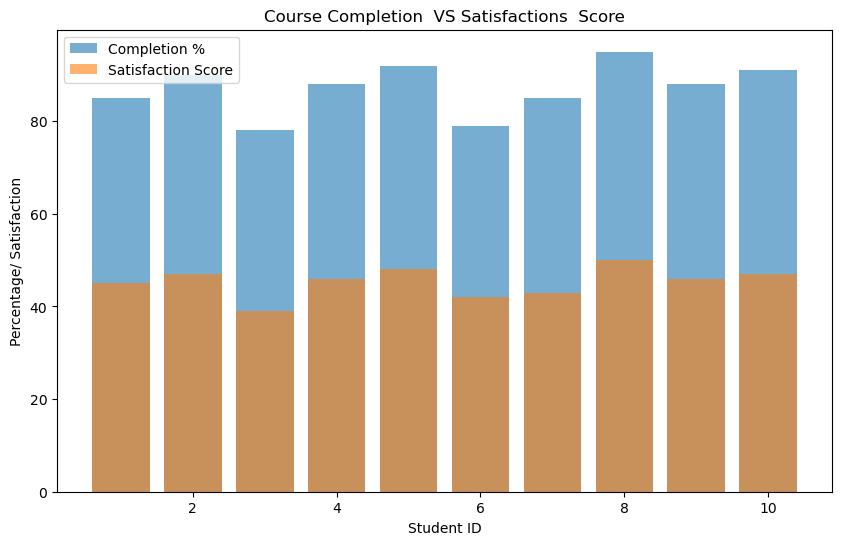

In [46]:
# Bar Plot for Course Completion vs. Satisfaction Score:
plt.figure(figsize=(10, 6))
plt.bar(data['Student_ID'], data['Course_Completion_Percentage'], alpha = 0.6, label = "Completion %")
plt.bar(data['Student_ID'], data['Student_Satisfaction_Score'] * 10, alpha =0.6, label = 'Satisfaction Score')
plt.xlabel('Student ID')
plt.ylabel('Percentage/ Satisfaction')
plt.title('Course Completion  VS Satisfactions  Score')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Forum Posts vs Satisfaction Score')

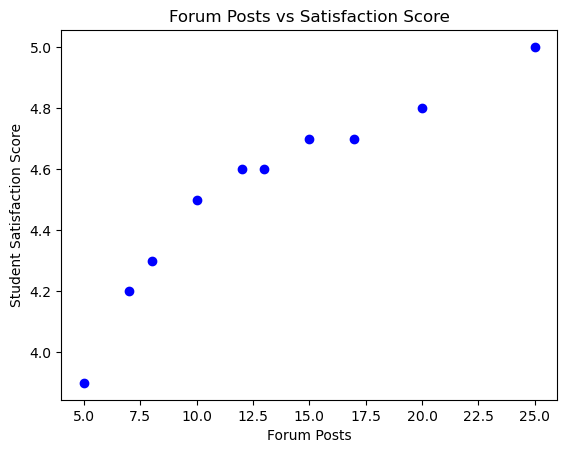

In [48]:
# Scatter Plot of Forum Posts vs Satisfaction Score

plt.scatter(data['Forum_Posts'], data['Student_Satisfaction_Score'], color ='blue', label = 'Forum Posts vs Satisfaction Score')
plt.xlabel('Forum Posts')
plt.ylabel('Student Satisfaction Score')
plt.title('Forum Posts vs Satisfaction Score')


In [52]:
# Example: Group by engagement level (completion percentage)
bins = [0,60, 80, 100]
labels = ['Low','Meduim', 'High']
data['Engagement_Level'] = pd.cut(data['Course_Completion_Percentage'], bins = bins, labels =labels)

data[['Student_ID', 'Course_Completion_Percentage', 'Engagement_Level']]

,Student_ID,Course_Completion_Percentage,Engagement_Level
0,1,85,High
1,2,90,High
2,3,78,Meduim
3,4,88,High
4,5,92,High
5,6,79,Meduim
6,7,85,High
7,8,95,High
8,9,88,High
9,10,91,High


In [54]:
# Group by engagement level and calculate average satisfaction score
Engagement_group = data.groupby('Engagement_Level')['Course_Completion_Percentage'].mean()

Engagement_group

Engagement_Level
Low         NaN
Meduim    78.50
High      89.25
Name: Course_Completion_Percentage, dtype: float64

In [56]:
# Example: Using NumPy to perform matrix multiplication for understanding relationship between engagement metrics
X = np.array([data['Course_Completion_Percentage'], data['Forum_Posts']])
y = np.array(data['Student_Satisfaction_Score'])
# Applying Linear Regression Model (simplified)
X_transpose = X.T
beta = np.linalg.inv(X.dot(X_transpose)).dot(X).dot(y)
print(f"Regression Coefficients: {beta}")

Regression Coefficients: [0.05110985 0.00591885]
